# Chapter 2 Exercises
# Multi-armed Bandits

In [411]:
# Simulate the 4-arm testbed. Simulate the average reward and % of optimal strategy for a 1000-step run. 
# Do 2000 independent runs. The reward distributions are Gaussian with means drawn from 0-mean and 1-variance Gaussian distribution.
# The reward distributions have variance = 1

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [413]:
# Define the reward means and variances

In [356]:
#np.random.seed(42) This contols all the random generations in our code - use RandomState
random_state   = np.random.RandomState(42)
reward_means   = random_state.normal(0,1,4)
reward_vars    = np.array([1,1,1,1])
optimal_action = reward_means.argmax()

In [357]:
reward_means

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986])

In [358]:
# Initiate the action values

In [359]:
# Explore the effects of Epsilon on average award and % of optimal actions. 

In [360]:
epsilon = np.array([0, 0.01, 0.1, 0.25])
steps    = 1000
runs     = 2000
R_matrix = np.zeros((len(epsilon), runs, steps))
a_matrix = np.zeros((len(epsilon), runs, steps))

In [361]:
for ind in range(0,len(epsilon)):
    
    greedy_action = 1 - epsilon[ind]
    any_action    = epsilon[ind]
    
    for run in range(0, runs):
        N     = np.zeros(4) # Initialize Ns
        R_history      = [] # Store R for every run
        action_history = [] # Store a for every run
        Q_0 = np.zeros(4) # Initialize the action values

        # Beware of the effect of the initializaiton of Q_0 (Chapter 2.5).
        # Optimistic initialization can be preferrable for greedy algos.

        for step in range(0,steps):

            # Find the action
            if np.random.rand() < greedy_action: # Greedy action
                max_indices =np.flatnonzero(Q_0 == np.max(Q_0)) 
                a = np.random.choice(max_indices)
                action_history.append(a)
            else: # Any random action
                a = np.random.randint(0, 4)
                action_history.append(a)

            # Draw the reward from the distribution
            R      = np.random.normal(reward_means[a],reward_vars[a])
            R_history.append(R)

            #Increment N
            N[a]   = N[a] + 1 

            #Calculate action-values estimate
            Q_0[a] = Q_0[a] + (1/N[a])* (R - Q_0[a])

        R_matrix[ind, run,:] = R_history
        a_matrix[ind, run,:] = action_history


In [362]:
#R_matrix

In [363]:
#a_matrix

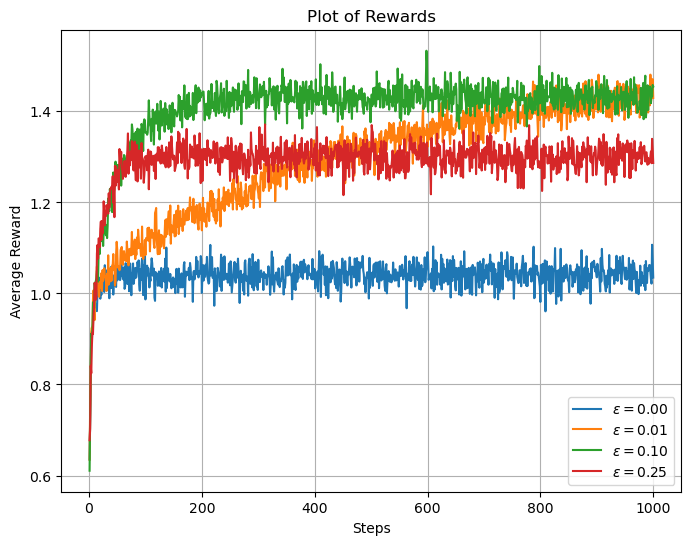

In [367]:
# Find average rewards and %of optimal actions
R_avg = np.mean(R_matrix, axis=1)

# Plot the Reward

x = np.linspace(1, steps, steps)
y = R_avg

plt.figure(figsize=(8, 6))

for i in range(y.shape[0]):
    plt.plot(x, y[i], label=f'$\epsilon = {epsilon[i]:.2f}$')

plt.title('Plot of Rewards')
plt.xlabel('Steps')
plt.ylabel('Average Reward')

plt.legend()

plt.grid(True)

# Show the plot
plt.show()

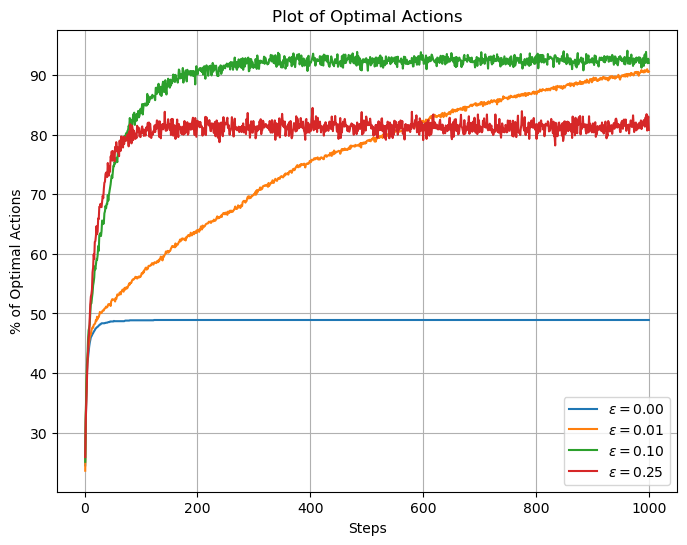

In [368]:
# Plot the % of Optimal Actions
optimal_action_pct = (np.sum(a_matrix == optimal_action, axis=1)/runs)*100

x = np.linspace(1, steps, steps)
y = optimal_action_pct

plt.figure(figsize=(8, 6))

for i in range(y.shape[0]):
    plt.plot(x, y[i], label=f'$\epsilon = {epsilon[i]:.2f}$')

plt.title('Plot of Optimal Actions')
plt.xlabel('Steps')
plt.ylabel('% of Optimal Actions')

plt.legend()

plt.grid(True)

# Show the plot
plt.show()

# Multi-armed Bandits with Optimistic Intial Values

In [369]:
epsilon = np.array([0, 0.01, 0.1, 0.25])
steps    = 1000
runs     = 2000
R_matrix = np.zeros((len(epsilon), runs, steps))
a_matrix = np.zeros((len(epsilon), runs, steps))

In [370]:
for ind in range(0,len(epsilon)):
    
    greedy_action = 1 - epsilon[ind]
    any_action    = epsilon[ind]
    
    for run in range(0, runs):
        N     = np.zeros(4) # Initialize Ns
        R_history      = [] # Store R for every run
        action_history = [] # Store a for every run
        Q_0 = np.array([5.0,5.0,5.0,5.0]) # Initialize the action values


        for step in range(0,steps):

            # Find the action
            if np.random.rand() < greedy_action: # Greedy action
                max_indices =np.flatnonzero(Q_0 == np.max(Q_0)) 
                a = np.random.choice(max_indices)
                action_history.append(a)
            else: # Any random action
                a = np.random.randint(0, 4)
                action_history.append(a)

            # Draw the reward from the distribution
            R      = np.random.normal(reward_means[a],reward_vars[a])
            R_history.append(R)

            #Increment N
            N[a]   = N[a] + 1 

            #Calculate action-values estimate
            Q_0[a] = Q_0[a] + (1/N[a])* (R - Q_0[a])

        R_matrix[ind, run,:] = R_history
        a_matrix[ind, run,:] = action_history


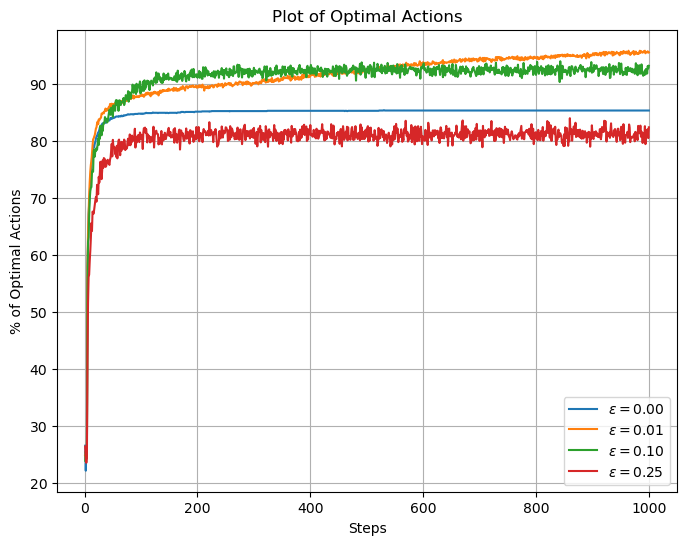

In [376]:
# Plot the % of Optimal Actions
optimal_action_pct = (np.sum(a_matrix == optimal_action, axis=1)/runs)*100

x = np.linspace(1, steps, steps)
y = optimal_action_pct

plt.figure(figsize=(8, 6))

for i in range(y.shape[0]):
    plt.plot(x, y[i], label=f'$\epsilon = {epsilon[i]:.2f}$')

plt.title('Plot of Optimal Actions')
plt.xlabel('Steps')
plt.ylabel('% of Optimal Actions')

plt.legend()

plt.grid(True)

# Show the plot
plt.show()

In [377]:
# Note that the % of Optimal Actions went up for even for the greedy algo. This is because an overly optimistic action-value of 5 
# explores actions that would have not been explored at Q_0 = 0.

In [378]:
# Now let's compare the % of optimal action for the same epsilon but different Q_0

In [379]:
eps = 0.01
steps    = 1000
runs     = 2000
R_matrix = np.zeros((2, runs, steps))
a_matrix = np.zeros((2, runs, steps))

greedy_action = 1 - eps

for i in range(0,2):
    
    for run in range(0, runs):
        N     = np.zeros(4) # Initialize Ns
        R_history      = [] # Store R for every run
        action_history = [] # Store a for every run
        if i== 0:
            Q_0 = np.array([5.0,5.0,5.0,5.0]) # Initialize the action values
        else:
            Q_0 = np.zeros(4)

        for step in range(0,steps):

            # Find the action
            if np.random.rand() < greedy_action: # Greedy action
                max_indices =np.flatnonzero(Q_0 == np.max(Q_0)) 
                a = np.random.choice(max_indices)
                action_history.append(a)
            else: # Any random action
                a = np.random.randint(0, 4)
                action_history.append(a)

            # Draw the reward from the distribution
            R      = np.random.normal(reward_means[a],reward_vars[a])
            R_history.append(R)

            #Increment N
            N[a]   = N[a] + 1 

            #Calculate action-values estimate
            Q_0[a] = Q_0[a] + (1/N[a])* (R - Q_0[a])
    
        R_matrix[i, run,:] = R_history
        a_matrix[i, run,:] = action_history

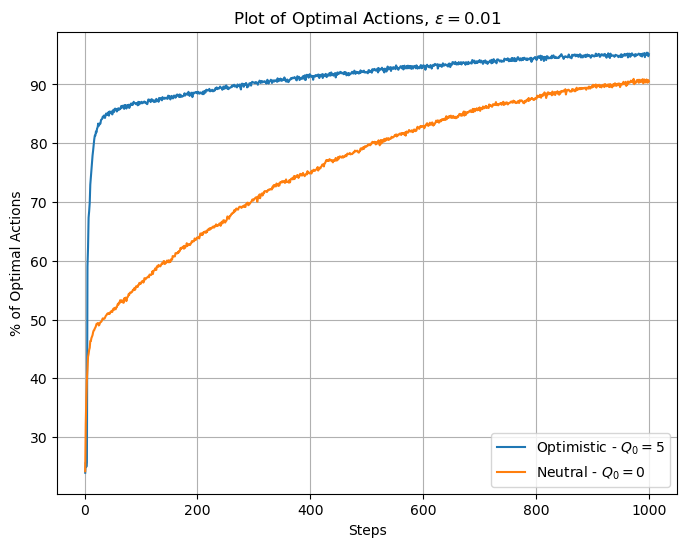

In [380]:
# Plot the % of Optimal Actions
labels = ['Optimistic - $Q_0 = 5$', 'Neutral - $Q_0 = 0$']
optimal_action_pct = (np.sum(a_matrix == optimal_action, axis=1)/runs)*100

x = np.linspace(1, steps, steps)
y = optimal_action_pct

plt.figure(figsize=(8, 6))

for i in range(y.shape[0]):
    plt.plot(x, y[i], label=labels[i])

plt.title(f'Plot of Optimal Actions, $\epsilon = {eps:.2f}$')
plt.xlabel('Steps')
plt.ylabel('% of Optimal Actions')

plt.legend()

plt.grid(True)

# Show the plot
plt.show()

# Exercises from Chapter 2

## Exercise 2.1

In [372]:
# In epsilon-greedy action selection, for the case of two actions and epsilon = 0.5, what is
#the probability that the greedy action is selected? 

# Answer: 0.75

## Exercise 2.2

In [375]:
#Exercise 2.2: Bandit example Consider a k-armed bandit problem with k = 4 actions,
#denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using
#epsilon-greedy action selection, sample-average action-value estimates, and initial estimates
#of Q1(a) = 0, for all a. Suppose the initial sequence of actions and rewards is A1 = 1,
#R1 = -1, A2 = 2, R2 = 1, A3 = 2, R3 = - 2, A4 = 2, R4 = 2, A5 = 3, R5 = 0. On some
#of these time steps the " case may have occurred, causing an action to be selected at
#random. On which time steps did this definitely occur? On which time steps could this
#possibly have occurred?

# Answer: A1 was chosen randomly (greed doesn't apply here since all Q = 0), because this is the first step after initialization.
# A2 Could've been choseen greedily or randomly. A1 was a "bad" immediate choice.
# A3 likely to be greedily, but also could've been randomly with probabiolity epsilon/4
# A4 Randomly because the estimate of action-value for A=2 is -0.5 which is less than 0
# A5 Randomly because the greedy choice would be A=2 since Q2 = 0.33 which is higher than the other action values

## Exercise 2.5 - Non-stationary Rewards and Learning Rate

In [381]:
#Exercise 2.5 (programming) Design and conduct an experiment to demonstrate the
#diculties that sample-average methods have for nonstationary problems. Use a modified
#version of the 10-armed testbed in which all the q⇤(a) start out equal and then take
#independent random walks (say by adding a normally distributed increment with mean 0
#and standard deviation 0.01 to all the q⇤(a) on each step). Prepare plots like Figure 2.2
#for an action-value method using sample averages, incrementally computed, and another
#action-value method using a constant step-size parameter, alpha = 0.1. Use epsilon = 0.1 and
#longer runs, say of 10,000 steps.

In [479]:
eps      = 0.1
steps    = 8000
runs     = 2000
alpha    = 0.1
k        = 10
R_matrix = np.zeros((2, runs, steps))
a_matrix = np.zeros((2, runs, steps))
optimal_a_matrix = np.zeros((2, runs, steps))
greedy_action = 1 - eps

for i in range(0,2):
    
    for run in range(0, runs):
        random_state      = np.random.RandomState(42)
        reward_means      = random_state.normal(0,1,k)
        reward_vars       = np.ones(k)
        optimal_action    = reward_means.argmax()
        N                 = np.zeros(k) # Initialize Ns
        R_history         = [] # Store R for every run
        action_history    = [] # Store a for every run
        optimal_a_history = []
        Q_0               = np.zeros(k)

        for step in range(0,steps):

            # Find the action
            if np.random.rand() < greedy_action: # Greedy action
                max_indices =np.flatnonzero(Q_0 == np.max(Q_0)) 
                a = np.random.choice(max_indices)
                action_history.append(a)
            else: # Any random action
                a = np.random.randint(0, k)
                action_history.append(a)

            # Draw the reward from the distribution
             
            R  = np.random.normal(reward_means[a],reward_vars[a])
            R_history.append(R)

            #Increment N
            N[a]   = N[a] + 1 

            #Calculate action-values estimate
            if i == 0:
                #sample-average
                Q_0[a] = Q_0[a] + (1/N[a])* (R - Q_0[a])
            else:
                #constant step
                Q_0[a] = Q_0[a] + alpha* (R - Q_0[a])
            
            
            optimal_a_history.append(reward_means.argmax())
            # Add non-stationarity to the reward-means, i.e. q*(a)
            
            random_walk   = np.random.normal(0, 0.01, k)
            reward_means += random_walk
            
        R_matrix[i, run,:]         = R_history
        a_matrix[i, run,:]         = action_history
        optimal_a_matrix[i, run,:] = optimal_a_history 

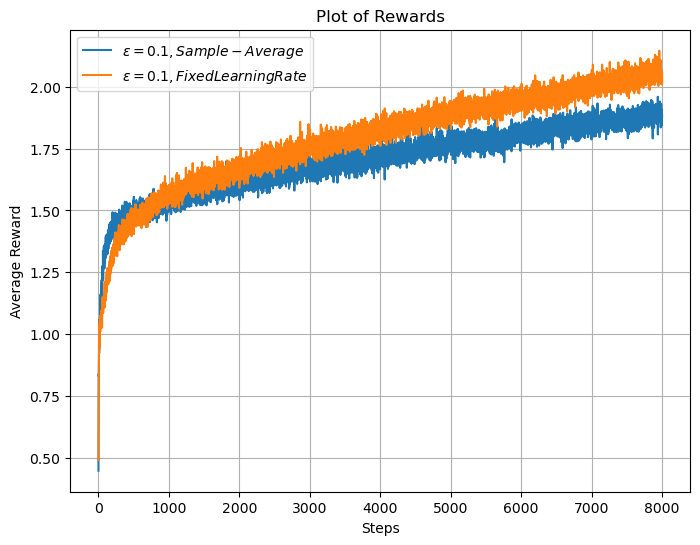

In [480]:
# Find average rewards and %of optimal actions
R_avg = np.mean(R_matrix, axis=1)
alpha_list = ['Sample-Average', 'Fixed Learning Rate']

# Plot the Reward

x = np.linspace(1, steps, steps)
y = R_avg

plt.figure(figsize=(8, 6))

for i in range(y.shape[0]):
    plt.plot(x, y[i], label=f'$\epsilon = {eps}, {alpha_list[i]}$')

plt.title('Plot of Rewards')
plt.xlabel('Steps')
plt.ylabel('Average Reward')

plt.legend()

plt.grid(True)

# Show the plot
plt.show()

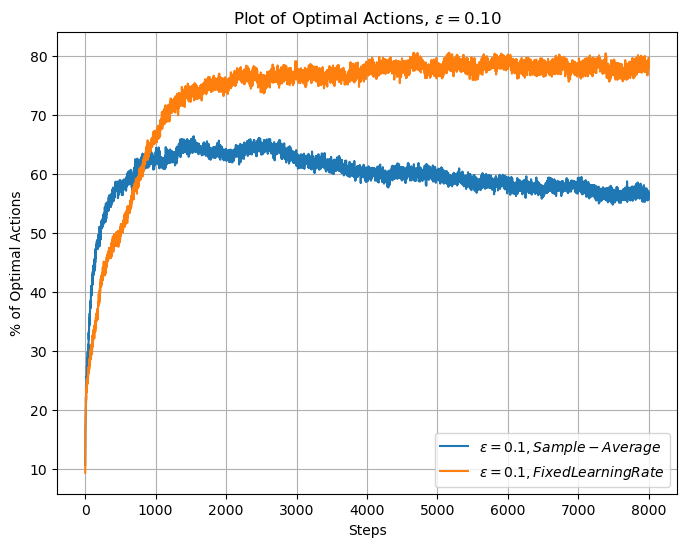

In [481]:
# Plot the % of Optimal Actions
optimal_action_pct = (np.sum(a_matrix == optimal_a_matrix, axis=1)/runs)*100

x = np.linspace(1, steps, steps)
y = optimal_action_pct

plt.figure(figsize=(8, 6))

for i in range(y.shape[0]):
    plt.plot(x, y[i], label=f'$\epsilon = {eps}, {alpha_list[i]}$')

plt.title(f'Plot of Optimal Actions, $\epsilon = {eps:.2f}$')
plt.xlabel('Steps')
plt.ylabel('% of Optimal Actions')

plt.legend()

plt.grid(True)

# Show the plot
plt.show()

## Exercise 2.11 - Parameter Study of Greedy, e-Greedy, UCB and Gradient Bandit Methods.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The exercise doesn't mention if the learning rate is constant or sample-averaged. I read that in non-stationary environments
# it's better to use fixed learning rate to adapt faster becauses it places more emphasis on recent awards.

In [10]:
# Epsilon Greedy First

epsilon    = np.array([1/128, 1/64, 1/32, 1/16, 1/8, 1/4]) 
steps      = 2000 
runs       = 3000
k          = 10
alpha      = 0.1
eps_R_hist = np.zeros((len(epsilon), runs, steps))

for i in range(0,len(epsilon)):
    
    greedy_action = 1 - epsilon[i]
    
    for run in range(0, runs):
        random_state      = np.random.RandomState(42)
        reward_means      = random_state.normal(0,1,k)
        reward_vars       = np.ones(k)
        N                 = np.zeros(k) # Initialize Ns
        R_history         = [] # Store R for every run
        Q_0               = np.zeros(k)
        
        for step in range(0,steps):

            # Find the action
            if np.random.rand() < greedy_action: # Greedy action
                max_indices =np.flatnonzero(Q_0 == np.max(Q_0)) 
                a = np.random.choice(max_indices)
            else: # Any random action
                a = np.random.randint(0, k)

            # Draw the reward from the distribution
            R  = np.random.normal(reward_means[a],reward_vars[a])
            R_history.append(R)

            #Calculate action-values estimate
            Q_0[a] = Q_0[a] + alpha* (R - Q_0[a])
            

            # Add non-stationarity to the reward-means, i.e. q*(a)
            random_walk   = np.random.normal(0, 0.05, k)
            reward_means += random_walk
            
        eps_R_hist[i, run,:]  = R_history

In [53]:
# Find average rewards and %of optimal actions
Avg_reward_eps_greedy = np.mean(np.mean(eps_R_hist, axis=1)[:, 1000:], axis = 1)
Avg_reward_eps_greedy

array([2.79668076, 2.82851191, 3.00742215, 3.08817356, 3.06204629,
       2.77126911])

In [55]:
# Greedy Algo

Q_0_test   = np.array([1/4,1/2,1,2,4]) 
steps      = 2000 
runs       = 3000
k          = 10
alpha      = 0.1
Q_0_R_hist = np.zeros((len(Q_0_test), runs, steps))

for i in range(0,len(Q_0_test)): 
    Q_0 = np.zeros(k) + Q_0_test[i]
    for run in range(0, runs):
        random_state      = np.random.RandomState(42)
        reward_means      = random_state.normal(0,1,k)
        reward_vars       = np.ones(k)
        N                 = np.zeros(k) # Initialize Ns
        R_history         = [] # Store R for every run
        
        for step in range(0,steps):
            
            # Find the action
            max_indices = np.flatnonzero(Q_0 == np.max(Q_0)) 
            a = np.random.choice(max_indices)

            # Draw the reward from the distribution
            R  = np.random.normal(reward_means[a],reward_vars[a])
            R_history.append(R)
            
            N[a]   = N[a] + 1 
            #Calculate action-values estimate
            Q_0[a] = Q_0[a] + alpha* (R - Q_0[a])
            

            # Add non-stationarity to the reward-means, i.e. q*(a)
            random_walk   = np.random.normal(0, 0.05, k)
            reward_means += random_walk
            
        Q_0_R_hist[i, run,:]  = R_history

In [56]:
Avg_reward_greedy = np.mean(np.mean(Q_0_R_hist, axis=1)[:, 1000:], axis = 1)

In [57]:
Avg_reward_greedy

array([1.19523218, 1.23080302, 1.22761156, 1.23447246, 1.154607  ])

In [58]:
# UCB

c          = np.array([1/8, 1/4, 1/2, 1, 2, 4])  # Different values of c to test
steps      = 2000 
runs       = 3000
k          = 10
alpha      = 0.1
ucb_R_hist = np.zeros((len(c), runs, steps))

for i in range(len(c)):
    
    for run in range(runs):
        random_state      = np.random.RandomState(42)
        reward_means      = random_state.normal(0,1,k)
        reward_vars       = np.ones(k)
        N                 = np.zeros(k)  # Number of times each action was selected
        R_history         = []  # Store rewards for each run
        Q_0               = np.zeros(k)  # Initial action values

        for step in range(steps):   
            
            if step < k:  # To ensure every action is selected at least once
                a = step # a considered a maximizing action if N[a] = 0 basically meaning we take all the actions that
                # have not been taken yet
            else:
                confidence_bounds = Q_0 + c[i] * np.sqrt(np.log(step + 1) / (N[a]))  # Add 1e-5 to avoid division by zero
                max_indices       = np.flatnonzero(confidence_bounds == np.max(confidence_bounds))
                a                 = np.random.choice(max_indices)
                
            # Draw the reward from the distribution
            R  = np.random.normal(reward_means[a], reward_vars[a])
            R_history.append(R)

            # Update action count and value estimate
            N[a]   = N[a] + 1 
            Q_0[a] = Q_0[a] + alpha * (R - Q_0[a])

            # Add non-stationarity to the reward means
            random_walk   = np.random.normal(0, 0.05, k)
            reward_means += random_walk

        ucb_R_hist[i, run, :] = R_history

In [68]:
Avg_reward_ucb = np.mean(np.mean(ucb_R_hist, axis=1)[:, 1000:], axis = 1)
Avg_reward_ucb                      

array([2.68339232, 2.68483429, 2.72051318, 2.68954241, 2.69739993,
       2.64842541])

In [64]:
# Bandit Gradient

alpha      = np.array([1/32, 1/16, 1/8, 1/4, 1/2, 1])  # Different values of c to test
steps      = 2000
runs       = 3000
k          = 10
H          = np.zeros(k)
bg_R_hist  = np.zeros((len(alpha), runs, steps))

def softmax (H):
    #return softmax based on preferences
    exp = np.exp(H)
    return exp/np.sum(exp)


for i in range(len(alpha)):
    
    for run in range(runs):
        random_state      = np.random.RandomState(42)
        reward_means      = random_state.normal(0, 1, k)  # Mean rewards for each arm
        reward_vars       = np.ones(k)  # Variances for each arm's reward
        H                 = np.zeros(k)  # Initialize action preferences
        R_history         = []  # Store rewards for each run
        avg_reward        = 0  # Initialize the average reward
        

        for step in range(steps):   
            
            # Calculate the action probabilities using softmax
            action_probs = softmax(H)
            
            # Select an action based on the probabilities
            a = np.random.choice(np.arange(k), p=action_probs)
            
            # Draw the reward from the distribution
            R  = np.random.normal(reward_means[a], reward_vars[a])
            R_history.append(R)
            
            # Update the average reward (incremental average to avoid full recalculation)
            avg_reward += (R - avg_reward) / (step + 1)

            # Update action preferences using gradient ascent
            for action in range(k):
                if action == a:
                    H[action] += alpha[i] * (R - avg_reward) * (1 - action_probs[action])
                else:
                    H[action] -= alpha[i] * (R - avg_reward) * action_probs[action]
            # Add non-stationarity to the reward means
            random_walk   = np.random.normal(0, 0.05, k)
            reward_means += random_walk

        bg_R_hist[i, run, :] = R_history

        

In [65]:
Avg_reward_bg = np.mean(np.mean(bg_R_hist, axis=1), axis = 1)
Avg_reward_bg

array([2.26735364, 2.28568679, 2.26528811, 2.20657331, 2.09622797,
       1.9058092 ])

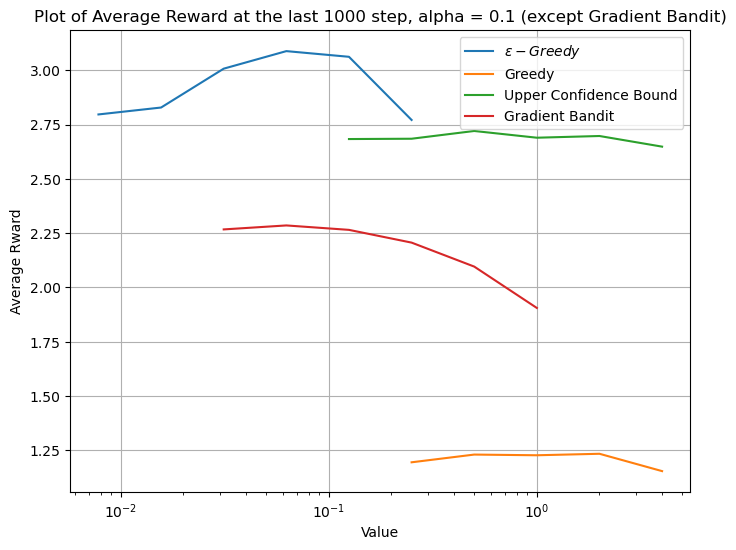

In [71]:
x = np.array([1/64,1/32,1/16,1/8,1/4,1/2,1,2,4])

y1 = Avg_reward_eps_greedy
y2 = Avg_reward_greedy
y3 = Avg_reward_ucb
y4 = Avg_reward_bg


plt.figure(figsize=(8, 6))

labels = ['$\epsilon-Greedy$', 'Greedy', 'Upper Confidence Bound', 'Gradient Bandit']

plt.plot(epsilon, y1, label=labels[0])
plt.plot(Q_0_test, y2, label=labels[1])
plt.plot(c, y3, label=labels[2])
plt.plot(alpha, y4, label=labels[3])

plt.title(f'Plot of Average Reward at the last 1000 step, alpha = 0.1 (except Gradient Bandit)')
plt.xlabel('Value')
plt.ylabel('Average Rward')

plt.legend()
plt.xscale('log')
plt.grid(True)

# Show the plot
plt.show()